In [1]:
import os

In [2]:
import re

In [3]:
regex = re.compile(r'\d+')

In [7]:
root_path = os.path.join('/','storage','yw18581','data','dataset','first_batch')

In [8]:
list_dirs = os.listdir(root_path)

In [9]:
root_path

'/storage/yw18581/data/dataset/first_batch'

In [10]:
list_dirs

['10x10_15mm_clean',
 '10x10_1mm_clean',
 '10x10_20mm_clean',
 '10x10_30mm_clean',
 '10x10_35mm_clean',
 '10x10_4mm_clean',
 '10x10_10mm_clean',
 '10x10_25mm_clean',
 '10x10_2mm_clean',
 '10x10_3mm_clean']

In [20]:
from pprint import pprint

In [26]:
distances = []
images_list = []
masks_list = []

def file_sort_key(fpath: str):
    # os.path.split(fpath) --> base, fname
    # os.path.splitext(fname) --> name, ext
    # example_filename: File_3_1mm_mask_2155.tiff
    _, fname = os.path.split(fpath)
    fname, _ = os.path.splitext(fname)
    _, dist, *rest = fname.split('_')
    return int(dist)


for folder in list_dirs:
    image_found = 0
    
    folder_imgs = []
    folder_masks = []
    
    for fname in sorted(os.listdir(os.path.join(root_path,folder))):
        if fname.startswith("File"):
            
            if "mask" not in fname:
                image_found+=1
                folder_imgs.append(os.path.join(root_path, folder, fname))
            else:
                folder_masks.append(os.path.join(root_path, folder, fname))
    
    assert len(folder_imgs) == len(folder_masks)
    
    folder_imgs = sorted(folder_imgs, key=file_sort_key)
    folder_masks = sorted(folder_masks, key=file_sort_key)
    
    images_list.extend(folder_imgs)
    masks_list.extend(folder_masks)
    
    dist = regex.findall(folder)[2]
    if image_found:
        distances.extend([int(dist) for _ in range(image_found)])

In [27]:
print(len(distances), len(images_list), len(masks_list))

3000 3000 3000


In [28]:
from random import choice

In [29]:
for i in range(10):
    idx = choice(range(len(distances)))
    print(f'Random Index: {idx}')
    print(distances[idx], images_list[idx], masks_list[idx])

Random Index: 1622
15 /storage/yw18581/data/first_batch/10x10_15mm_v2/File_122.tiff /storage/yw18581/data/first_batch/10x10_15mm_v2/File_122_15mm_mask_1892.tiff
Random Index: 2053
20 /storage/yw18581/data/first_batch/10x10_20mm_v1/File_253.tiff /storage/yw18581/data/first_batch/10x10_20mm_v1/File_253_20mm_mask_1800.tiff
Random Index: 2581
30 /storage/yw18581/data/first_batch/10x10_30mm_v1/File_181.tiff /storage/yw18581/data/first_batch/10x10_30mm_v1/File_181_30mm_mask_1595.tiff
Random Index: 1635
15 /storage/yw18581/data/first_batch/10x10_15mm_v2/File_135.tiff /storage/yw18581/data/first_batch/10x10_15mm_v2/File_135_15mm_mask_1888.tiff
Random Index: 2511
30 /storage/yw18581/data/first_batch/10x10_30mm_v1/File_111.tiff /storage/yw18581/data/first_batch/10x10_30mm_v1/File_111_30mm_mask_1593.tiff
Random Index: 2428
30 /storage/yw18581/data/first_batch/10x10_30mm_v1/File_28.tiff /storage/yw18581/data/first_batch/10x10_30mm_v1/File_28_30mm_mask_1600.tiff
Random Index: 2442
30 /storage/yw185

In [31]:
len(distances)

3000

#### using Transformers.py

In [1]:
import torch
import numpy as np
from torch.utils.data import DataLoader
import sys
import os

In [2]:
DATA_DIR_DEEPTHOUGHT="/storage/yw18581/data"
data_dir = DATA_DIR_DEEPTHOUGHT
train_test = os.path.join(data_dir, "train_validation_test")

In [3]:
fold = os.path.join(data_dir, "second_batch")

In [4]:
from torchvision import transforms

In [5]:
sys.path.append("../")

In [6]:
from Transformers import Dataset_from_folders, ChannelsFirst, Cut, ToTensor, Rescale

In [7]:
composed = transforms.Compose([Cut(), Rescale(0.25), ChannelsFirst(), ToTensor()])

In [8]:
dataset_from_folder = Dataset_from_folders(fold, transform=composed)

In [9]:
data_loader = DataLoader(dataset_from_folder, batch_size=16, shuffle=True, num_workers=4)

In [10]:
len(dataset_from_folder)

3000

In [11]:
import matplotlib.pyplot as plt

In [12]:
for i, batch in enumerate(data_loader):
    print(batch['image'].size(), batch['image'].dtype,
         batch['mask'].size(), batch['mask'].dtype,
         batch['dist'].size(), batch['dist'].dtype)
    if i==4:
        break   

torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16]) torch.int64
torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16]) torch.int64
torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16]) torch.int64
torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16]) torch.int64
torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16]) torch.int64


In [15]:
for i, batch in enumerate(data_loader):
    dists_batch = batch['dist']
    for j, dist in enumerate(dists_batch):
        print("batch:{}, item:{}, dist: {}".format(i+1, j+1, dist))
    if 1==2:
        break

batch:1, item:1, dist: 4
batch:1, item:2, dist: 2
batch:1, item:3, dist: 25
batch:1, item:4, dist: 30
batch:1, item:5, dist: 3
batch:1, item:6, dist: 3
batch:1, item:7, dist: 10
batch:1, item:8, dist: 35
batch:1, item:9, dist: 4
batch:1, item:10, dist: 30
batch:1, item:11, dist: 35
batch:1, item:12, dist: 2
batch:1, item:13, dist: 25
batch:1, item:14, dist: 10
batch:1, item:15, dist: 2
batch:1, item:16, dist: 15
batch:2, item:1, dist: 35
batch:2, item:2, dist: 20
batch:2, item:3, dist: 3
batch:2, item:4, dist: 30
batch:2, item:5, dist: 25
batch:2, item:6, dist: 1
batch:2, item:7, dist: 4
batch:2, item:8, dist: 1
batch:2, item:9, dist: 15
batch:2, item:10, dist: 20
batch:2, item:11, dist: 2
batch:2, item:12, dist: 35
batch:2, item:13, dist: 10
batch:2, item:14, dist: 10
batch:2, item:15, dist: 30
batch:2, item:16, dist: 10
batch:3, item:1, dist: 10
batch:3, item:2, dist: 2
batch:3, item:3, dist: 4
batch:3, item:4, dist: 4
batch:3, item:5, dist: 35
batch:3, item:6, dist: 10
batch:3, item

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fbc2cba5f28>>
Traceback (most recent call last):
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fbc2cba5f28>>
Traceback (most recent call last):
  File "/users/yw18581/.conda/envs/fluffy-bunnies/l

batch:13, item:1, dist: 4
batch:13, item:2, dist: 30
batch:13, item:3, dist: 25
batch:13, item:4, dist: 4
batch:13, item:5, dist: 3
batch:13, item:6, dist: 2
batch:13, item:7, dist: 35
batch:13, item:8, dist: 10
batch:13, item:9, dist: 4
batch:13, item:10, dist: 3
batch:13, item:11, dist: 15
batch:13, item:12, dist: 20
batch:13, item:13, dist: 10
batch:13, item:14, dist: 3
batch:13, item:15, dist: 2
batch:13, item:16, dist: 3
batch:14, item:1, dist: 2
batch:14, item:2, dist: 4
batch:14, item:3, dist: 1
batch:14, item:4, dist: 1
batch:14, item:5, dist: 35
batch:14, item:6, dist: 2
batch:14, item:7, dist: 15
batch:14, item:8, dist: 15
batch:14, item:9, dist: 2
batch:14, item:10, dist: 2
batch:14, item:11, dist: 25
batch:14, item:12, dist: 2
batch:14, item:13, dist: 25
batch:14, item:14, dist: 35
batch:14, item:15, dist: 35
batch:14, item:16, dist: 3
batch:15, item:1, dist: 10
batch:15, item:2, dist: 4
batch:15, item:3, dist: 10
batch:15, item:4, dist: 1
batch:15, item:5, dist: 35
batch:1

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fbc2cba5f28>>
Traceback (most recent call last):
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


batch:17, item:1, dist: 30
batch:17, item:2, dist: 10
batch:17, item:3, dist: 20
batch:17, item:4, dist: 30
batch:17, item:5, dist: 20
batch:17, item:6, dist: 25
batch:17, item:7, dist: 25
batch:17, item:8, dist: 20
batch:17, item:9, dist: 1
batch:17, item:10, dist: 4
batch:17, item:11, dist: 20
batch:17, item:12, dist: 2
batch:17, item:13, dist: 2
batch:17, item:14, dist: 1
batch:17, item:15, dist: 4
batch:17, item:16, dist: 35
batch:18, item:1, dist: 15
batch:18, item:2, dist: 25
batch:18, item:3, dist: 35
batch:18, item:4, dist: 3
batch:18, item:5, dist: 1
batch:18, item:6, dist: 1
batch:18, item:7, dist: 1
batch:18, item:8, dist: 1
batch:18, item:9, dist: 2
batch:18, item:10, dist: 3
batch:18, item:11, dist: 20
batch:18, item:12, dist: 15
batch:18, item:13, dist: 35
batch:18, item:14, dist: 25
batch:18, item:15, dist: 3
batch:18, item:16, dist: 35
batch:19, item:1, dist: 1
batch:19, item:2, dist: 10
batch:19, item:3, dist: 10
batch:19, item:4, dist: 4
batch:19, item:5, dist: 20
bat

KeyboardInterrupt: 

batch:1, item:1, dist: 10


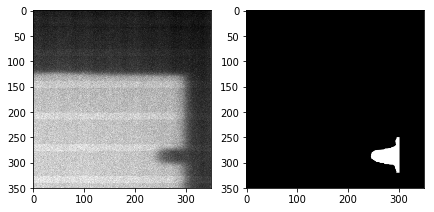

batch:1, item:2, dist: 15


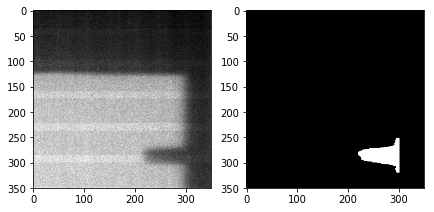

batch:1, item:3, dist: 20


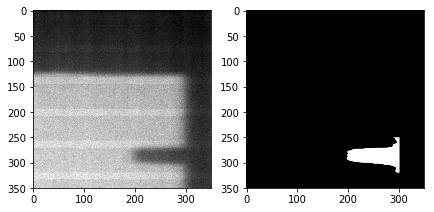

batch:1, item:4, dist: 15


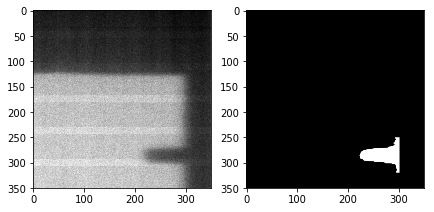

batch:1, item:5, dist: 30


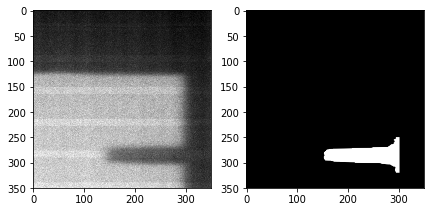

batch:1, item:6, dist: 35


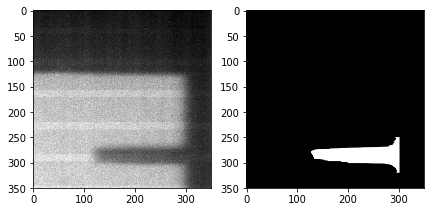

batch:1, item:7, dist: 2


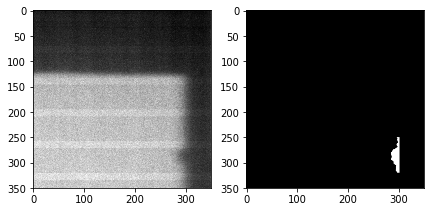

batch:1, item:8, dist: 2


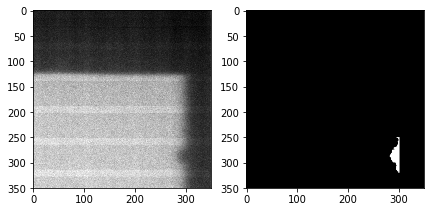

batch:1, item:9, dist: 1


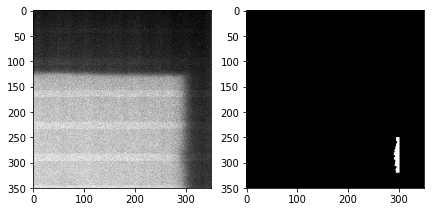

batch:1, item:10, dist: 3


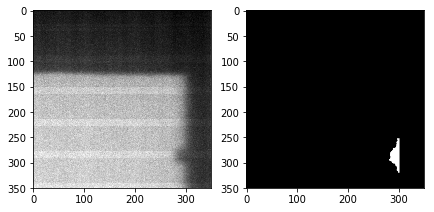

batch:1, item:11, dist: 15


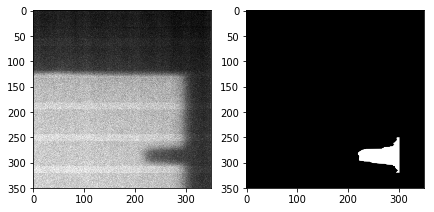

batch:1, item:12, dist: 20


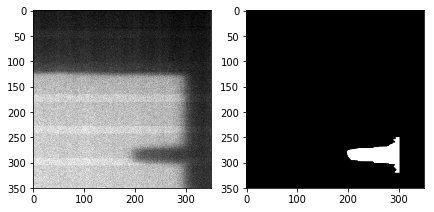

batch:1, item:13, dist: 2


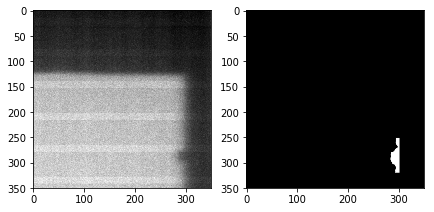

batch:1, item:14, dist: 30


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fbc2cba5f28>>
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/multiprocessing/process.py", line 122, in join
Traceback (most recent call last):
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
    assert self._parent_pid == os.getpid(), 'can only join a child process'
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/multiprocessing/process.py", line 122, in join
    w.join()
  File "/users/yw18581/.conda/envs/fluffy-bunnies/l

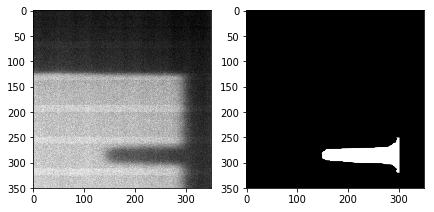

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fbc2cb1b710>>
Traceback (most recent call last):


batch:1, item:15, dist: 3


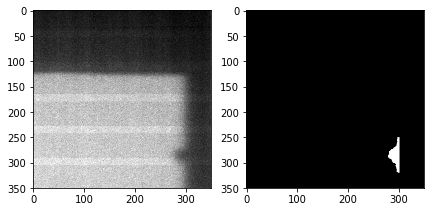

batch:1, item:16, dist: 2


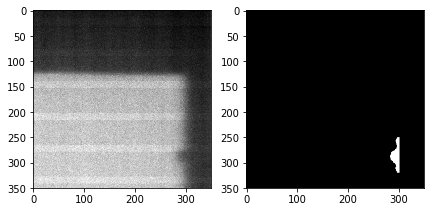

batch:2, item:1, dist: 20


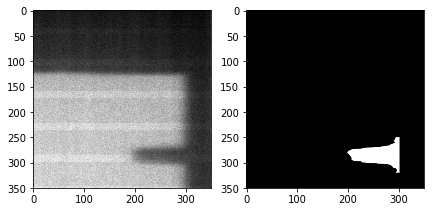

batch:2, item:2, dist: 1


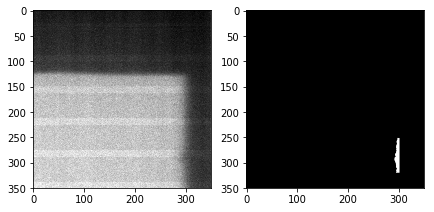

batch:2, item:3, dist: 4


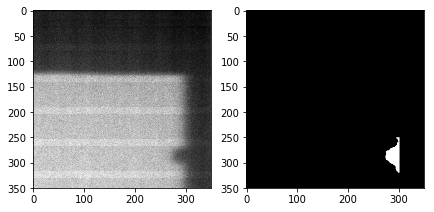

batch:2, item:4, dist: 35


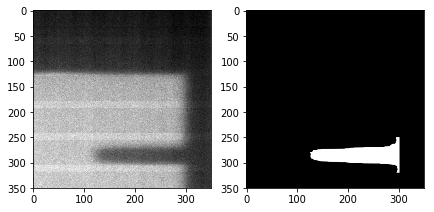

batch:2, item:5, dist: 30


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fbc2cba5f28>>
Traceback (most recent call last):
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fbc2cb1b710>>
Traceback (most recent call last):
  File "/users/yw18581/.conda/envs/fluffy-bunnies/l

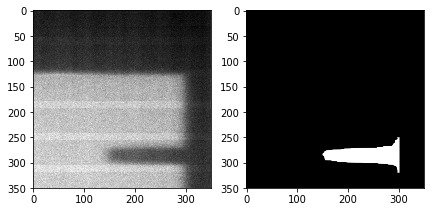

batch:2, item:6, dist: 35


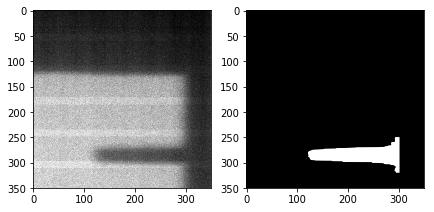

batch:2, item:7, dist: 1


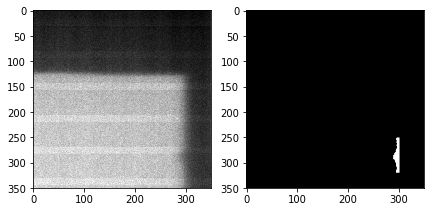

batch:2, item:8, dist: 1


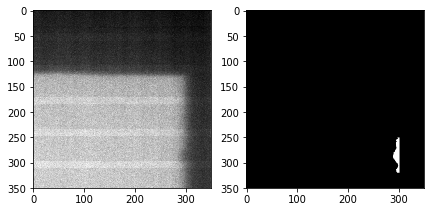

batch:2, item:9, dist: 35


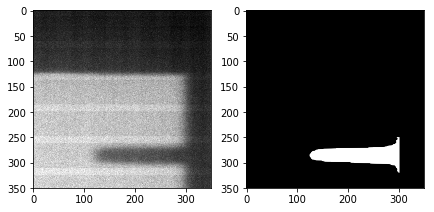

batch:2, item:10, dist: 4


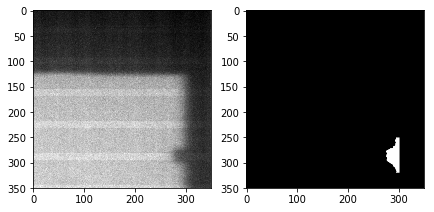

batch:2, item:11, dist: 25


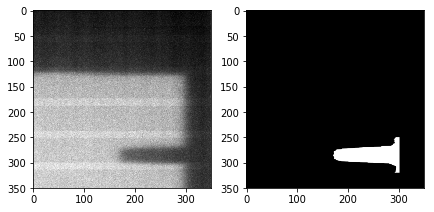

batch:2, item:12, dist: 4


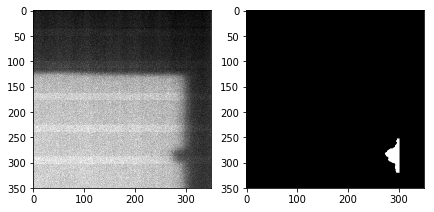

batch:2, item:13, dist: 20


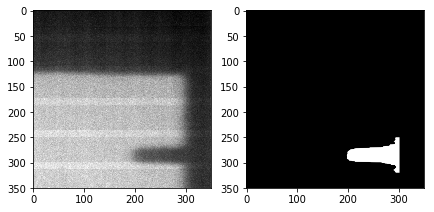

batch:2, item:14, dist: 4


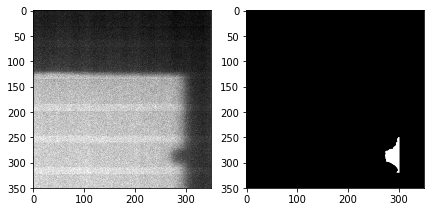

batch:2, item:15, dist: 15


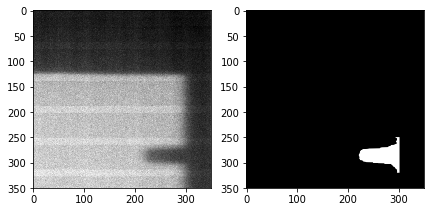

batch:2, item:16, dist: 1


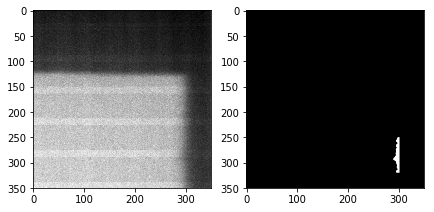

batch:3, item:1, dist: 4


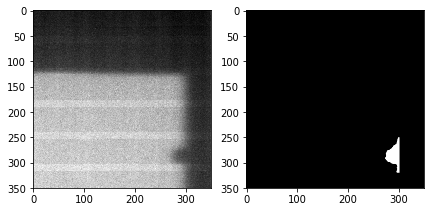

batch:3, item:2, dist: 10


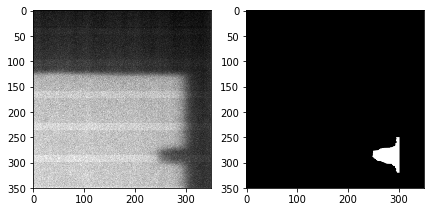

batch:3, item:3, dist: 1


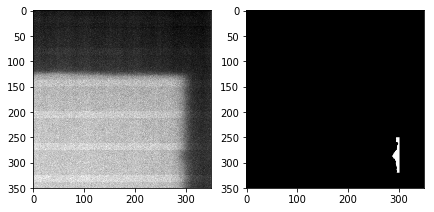

batch:3, item:4, dist: 3


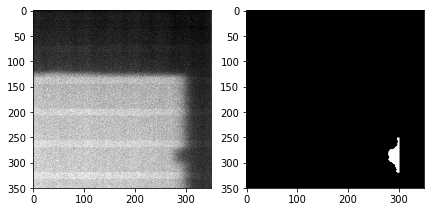

batch:3, item:5, dist: 1


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fbc2cba5f28>>
Traceback (most recent call last):
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()


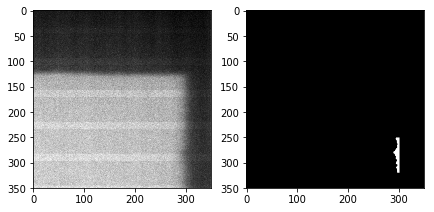

  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fbc2cb1b710>>
Traceback (most recent call last):
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/multiprocessing/process.py", lin

batch:3, item:6, dist: 20


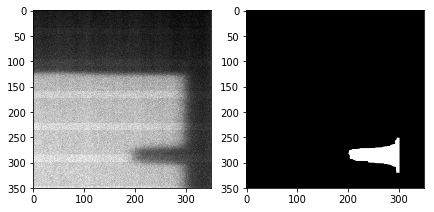

batch:3, item:7, dist: 2


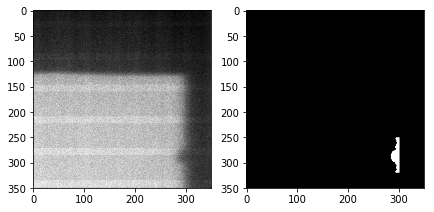

batch:3, item:8, dist: 25


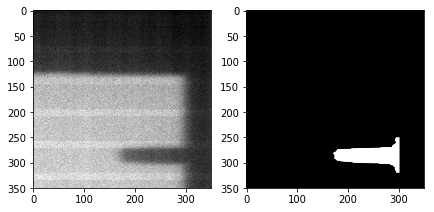

batch:3, item:9, dist: 15


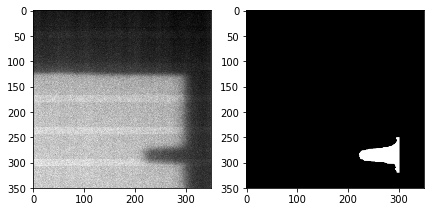

batch:3, item:10, dist: 20


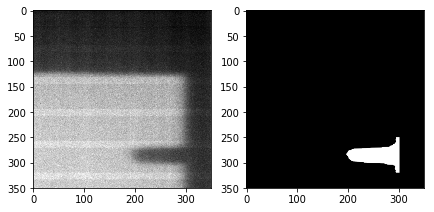

batch:3, item:11, dist: 4


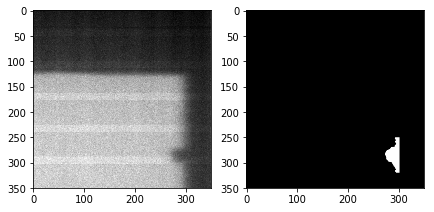

batch:3, item:12, dist: 20


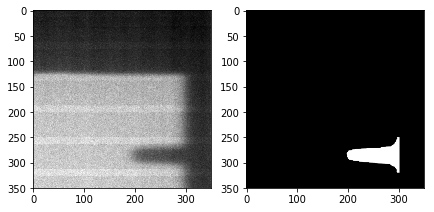

batch:3, item:13, dist: 30


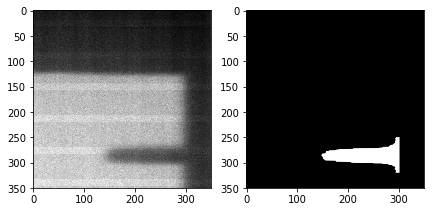

batch:3, item:14, dist: 35


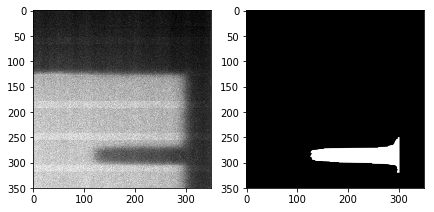

batch:3, item:15, dist: 1


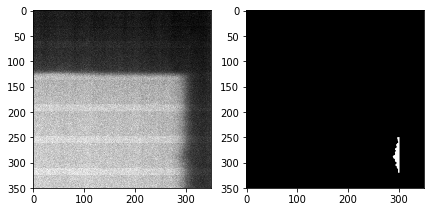

batch:3, item:16, dist: 30


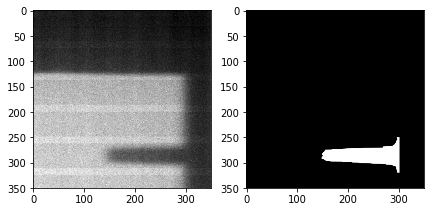

In [16]:
for i, batch in enumerate(data_loader):
    images_batch, masks_batch, dists_batch = batch['image'], batch['mask'], batch['dist']
    for j, (img, mask, dist) in enumerate(zip(images_batch, masks_batch, dists_batch)):
            
        print("batch:{}, item:{}, dist: {}".format(i+1, j+1, dist))
        f = plt.figure(figsize=(7,4))
        f.add_subplot(1,2, 1)
        plt.imshow(img[0,...], cmap='gray')
        f.add_subplot(1,2, 2)
        plt.imshow(mask[0,...], cmap='gray')
        plt.show(block=True)
    if i==2:
        break

#### alternative with `os.walk`

In [11]:
root_path = os.path.join('/','storage','yw18581','data','dataset')

In [14]:
for root_dir, dirs, files in os.walk(root_path):
    print(dirs)

['second_batch', 'third_batch', 'first_batch']
['10x10_10mm_second_clean', '10x10_15mm_second_clean', '10x10_1mm_second_clean', '10x10_20mm_second_clean', '10x10_25mm_second_clean', '10x10_2mm_second_clean', '10x10_30mm_second_clean', '10x10_35mm_second_clean', '10x10_3mm_second_clean', '10x10_4mm_second_clean']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['10x10_10mm_v1_clean', '10x10_15mm_v1_clean', '10x10_1mm_v3_clean', '10x10_20mm_v4_clean', '10x10_25mm_v3_clean', '10x10_2mm_v3_clean', '10x10_30mm_v3_clean', '10x10_35mm_v4_clean', '10x10_4mm_v1_clean', '10x10_3mm_v3_clean']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['10x10_15mm_clean', '10x10_1mm_clean', '10x10_20mm_clean', '10x10_30mm_clean', '10x10_35mm_clean', '10x10_4mm_clean', '10x10_10mm_clean', '10x10_25mm_clean', '10x10_2mm_clean', '10x10_3mm_clean']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [15]:
def file_sort_key(fpath: str):
    # os.path.split(fpath) --> base, fname
    # os.path.splitext(fname) --> name, ext
    # example_filename: File_3_1mm_mask_2155.tiff
    _, fname = os.path.split(fpath)
    fname, _ = os.path.splitext(fname)
    _, dist, *rest = fname.split('_')
    return int(dist)

In [59]:
distances = []
images_list = []
masks_list = []
excluded = ["first_batch", "third_batch", "10x10_35mm_second_clean"]

for root_dir, dirs, files in os.walk(root_path):
    image_found = 0
    mask_found = 0
    folder_imgs = []
    folder_masks = []
    dirs[:] = [d for d in dirs if d not in excluded]
    print(dirs)
    for fname in files:
        if fname.startswith("File") and fname.endswith(".tiff"):
            if "mask" not in fname:
                image_found+=1
                folder_imgs.append(os.path.join(root_dir, fname))
            elif 'mask' in fname:
                mask_found+=1
                folder_masks.append(os.path.join(root_dir, fname))
    #print(len(folder_imgs), len(folder_masks), root_dir)


    assert len(folder_imgs) == len(folder_masks)
    folder_imgs = sorted(folder_imgs, key=file_sort_key)
    folder_masks = sorted(folder_masks, key=file_sort_key)
    images_list.extend(folder_imgs)
    masks_list.extend(folder_masks)

    if image_found or mask_found:
        #print(folder)
        folder = root_dir.split('/')[-1]
        dist = regex.findall(folder.split('_')[1])[0]
        distances.extend([int(dist) for _ in range(image_found)])

['second_batch']
['10x10_10mm_second_clean', '10x10_15mm_second_clean', '10x10_1mm_second_clean', '10x10_20mm_second_clean', '10x10_25mm_second_clean', '10x10_2mm_second_clean', '10x10_30mm_second_clean', '10x10_3mm_second_clean', '10x10_4mm_second_clean']
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [60]:
print(len(distances), len(images_list), len(masks_list))

2700 2700 2700


#### test using Transformers.py

In [1]:
import torch
import numpy as np
from torch.utils.data import DataLoader
import sys
import os

In [2]:
DATA_DIR_DEEPTHOUGHT="/storage/yw18581/data"
data_dir = DATA_DIR_DEEPTHOUGHT

In [3]:
root_folder = os.path.join(data_dir, "dataset")

In [4]:
from torchvision import transforms

In [5]:
sys.path.append("../")

In [6]:
from DataSets import UNetDatasetFromFolders

In [7]:
from Transformers import ChannelsFirst, Cut, ToTensor, Rescale

In [8]:
composed = transforms.Compose([Cut(), Rescale(0.25), ChannelsFirst(), ToTensor()])

In [9]:
dataset_from_folder = UNetDatasetFromFolders(root_folder, transform=composed)

In [12]:
excluded = ["first_batch"]

In [13]:
dataset_from_folder = UNetDatasetFromFolders(root_folder, excluded=excluded, transform=composed)

In [14]:
data_loader = DataLoader(dataset_from_folder, batch_size=16, shuffle=True, num_workers=4)

In [15]:
len(dataset_from_folder)

5932

In [13]:
import matplotlib.pyplot as plt



In [14]:
for i, batch in enumerate(data_loader):
    print(batch['image'].size(), batch['image'].dtype,
         batch['mask'].size(), batch['mask'].dtype,
         batch['dist'].size(), batch['dist'].dtype)
    if i==4:
        break   

torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16]) torch.int64
torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16]) torch.int64
torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16]) torch.int64
torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16]) torch.int64
torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16, 1, 350, 350]) torch.float64 torch.Size([16]) torch.int64


In [15]:
for i, batch in enumerate(data_loader):
    dists_batch = batch['dist']
    for j, dist in enumerate(dists_batch):
        print("batch:{}, item:{}, dist: {}".format(i+1, j+1, dist))
    if i==2:
        break



batch:1, item:1, dist: 2
batch:1, item:2, dist: 1
batch:1, item:3, dist: 25
batch:1, item:4, dist: 15
batch:1, item:5, dist: 35
batch:1, item:6, dist: 1
batch:1, item:7, dist: 2
batch:1, item:8, dist: 35
batch:1, item:9, dist: 30
batch:1, item:10, dist: 35
batch:1, item:11, dist: 15
batch:1, item:12, dist: 4
batch:1, item:13, dist: 1
batch:1, item:14, dist: 30
batch:1, item:15, dist: 2
batch:1, item:16, dist: 30
batch:2, item:1, dist: 3
batch:2, item:2, dist: 4
batch:2, item:3, dist: 35
batch:2, item:4, dist: 20
batch:2, item:5, dist: 20
batch:2, item:6, dist: 15
batch:2, item:7, dist: 30
batch:2, item:8, dist: 3
batch:2, item:9, dist: 4
batch:2, item:10, dist: 4
batch:2, item:11, dist: 20
batch:2, item:12, dist: 4
batch:2, item:13, dist: 30
batch:2, item:14, dist: 35
batch:2, item:15, dist: 4
batch:2, item:16, dist: 2
batch:3, item:1, dist: 2
batch:3, item:2, dist: 20
batch:3, item:3, dist: 35
batch:3, item:4, dist: 15
batch:3, item:5, dist: 1
batch:3, item:6, dist: 15
batch:3, item:7

batch:1, item:1, dist: 30


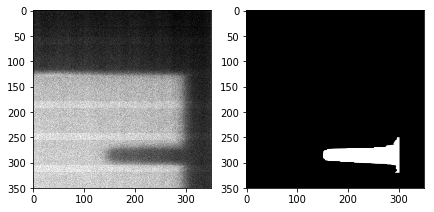

batch:1, item:2, dist: 25


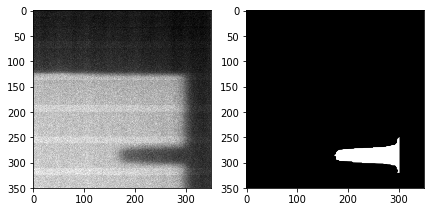

batch:1, item:3, dist: 4


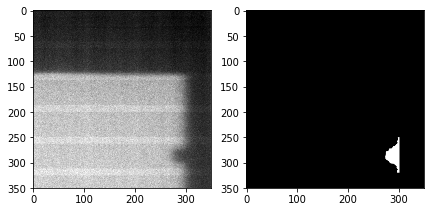

batch:1, item:4, dist: 20


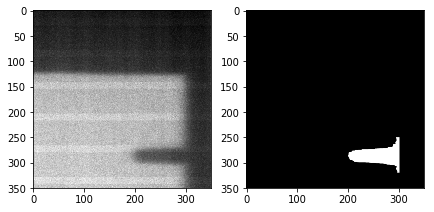

batch:1, item:5, dist: 15


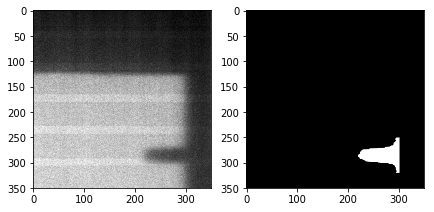

batch:1, item:6, dist: 4


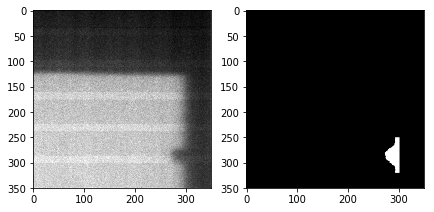

batch:1, item:7, dist: 10


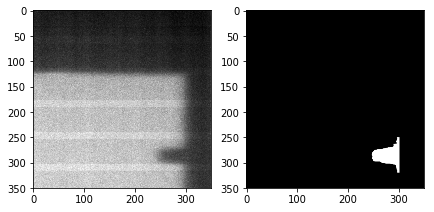

batch:1, item:8, dist: 25


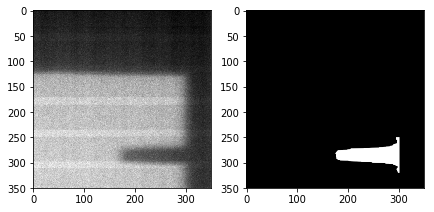

batch:1, item:9, dist: 20


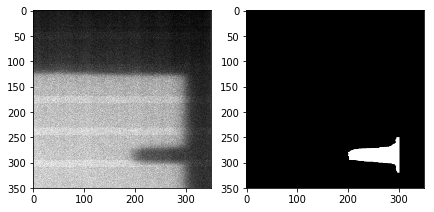

batch:1, item:10, dist: 3


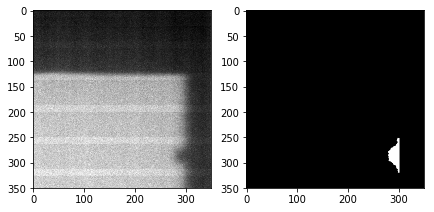

batch:1, item:11, dist: 3


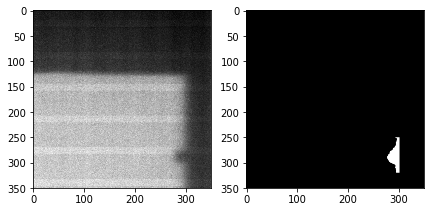

batch:1, item:12, dist: 25


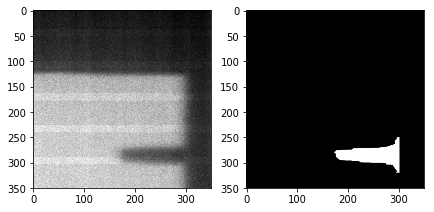

batch:1, item:13, dist: 25


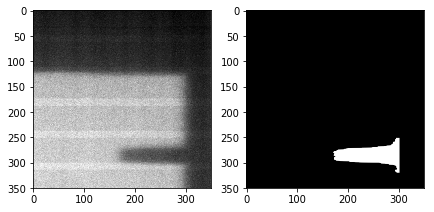

batch:1, item:14, dist: 10


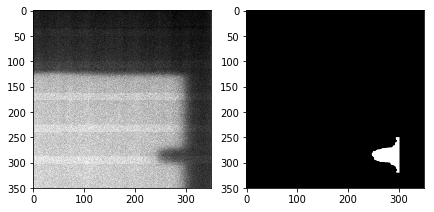

batch:1, item:15, dist: 25


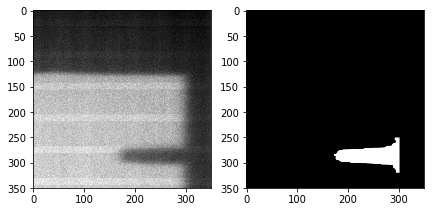

batch:1, item:16, dist: 15


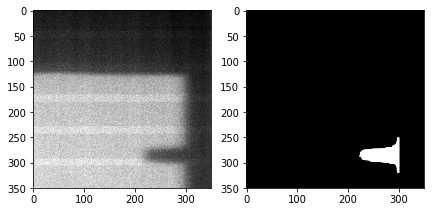

batch:2, item:1, dist: 2


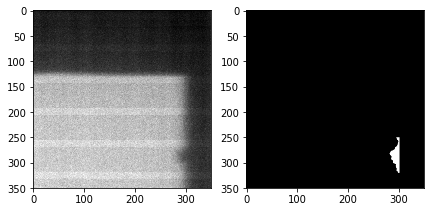

batch:2, item:2, dist: 25


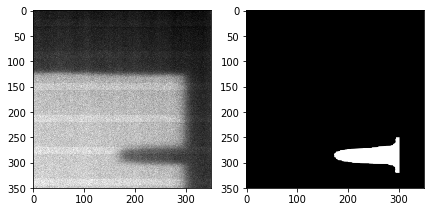

batch:2, item:3, dist: 35


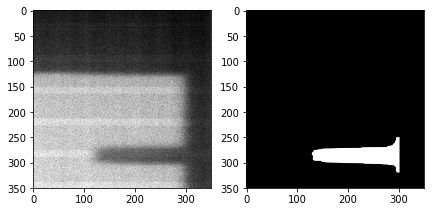

batch:2, item:4, dist: 20


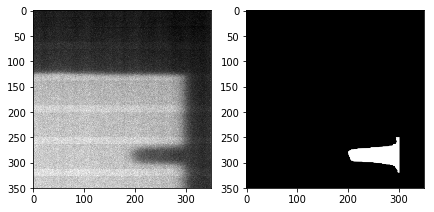

batch:2, item:5, dist: 2


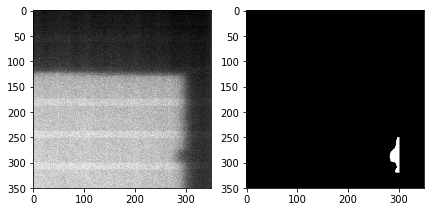

batch:2, item:6, dist: 3


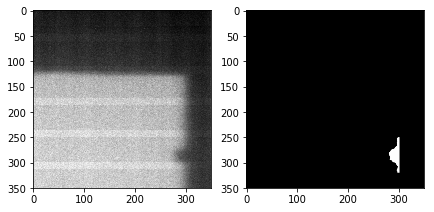

batch:2, item:7, dist: 25


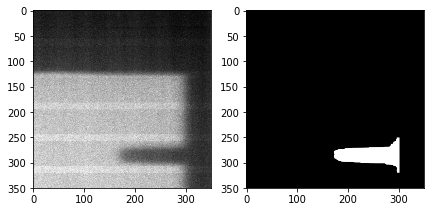

batch:2, item:8, dist: 2


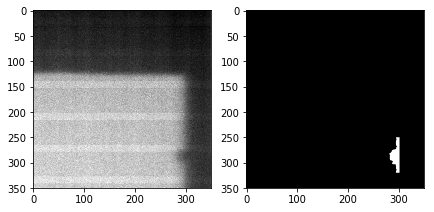

batch:2, item:9, dist: 25


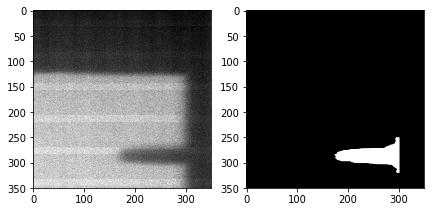

batch:2, item:10, dist: 30


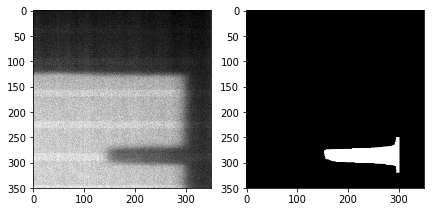

batch:2, item:11, dist: 15


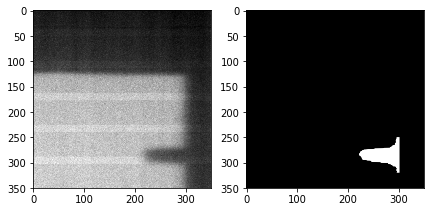

batch:2, item:12, dist: 10


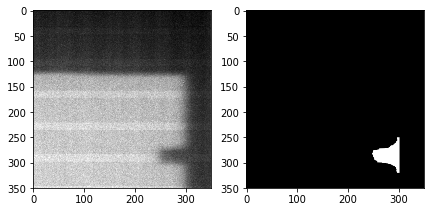

batch:2, item:13, dist: 10


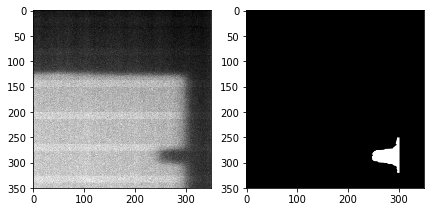

batch:2, item:14, dist: 1


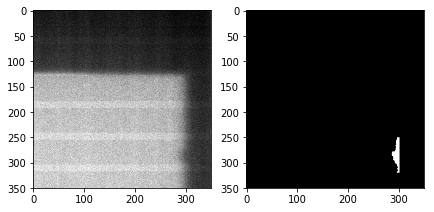

batch:2, item:15, dist: 25


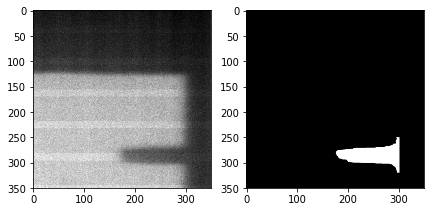

batch:2, item:16, dist: 35


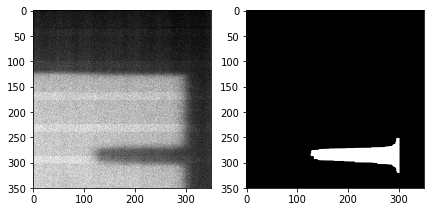

batch:3, item:1, dist: 15


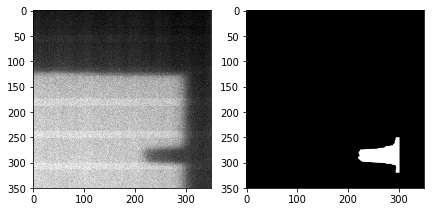

batch:3, item:2, dist: 2


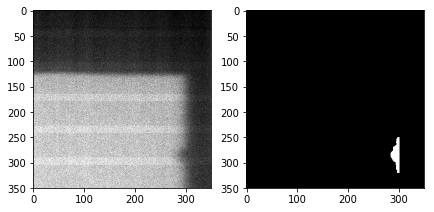

batch:3, item:3, dist: 3


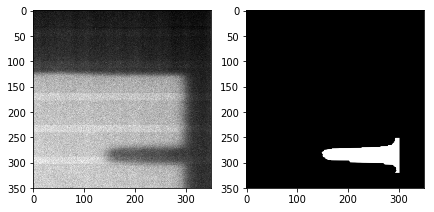

batch:3, item:4, dist: 10


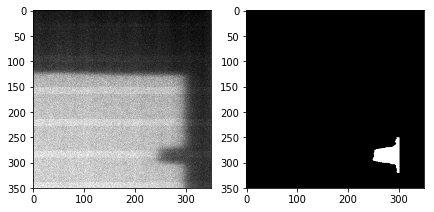

batch:3, item:5, dist: 20


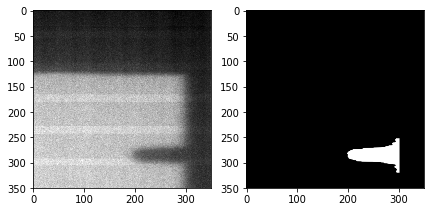

batch:3, item:6, dist: 30


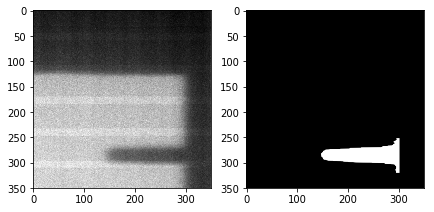

batch:3, item:7, dist: 4


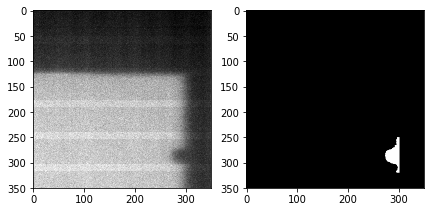

batch:3, item:8, dist: 4


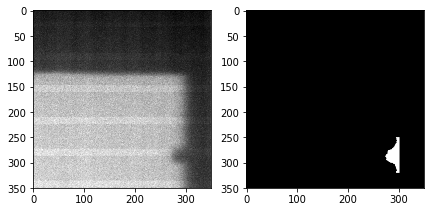

batch:3, item:9, dist: 1


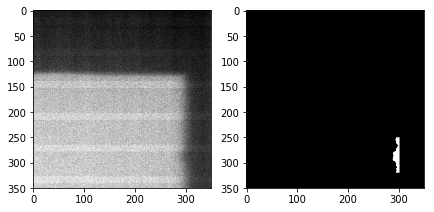

batch:3, item:10, dist: 1


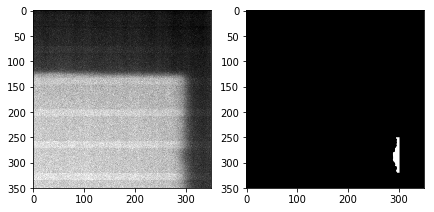

batch:3, item:11, dist: 2


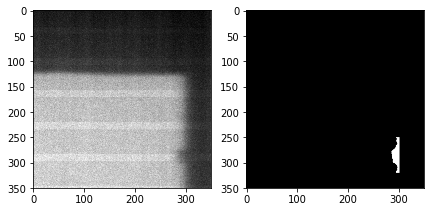

batch:3, item:12, dist: 2


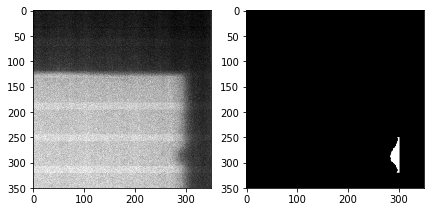

batch:3, item:13, dist: 10


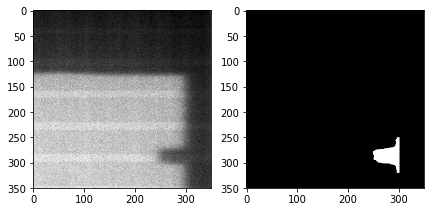

batch:3, item:14, dist: 1


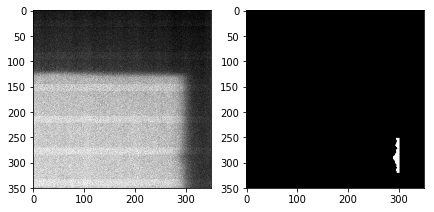

batch:3, item:15, dist: 15


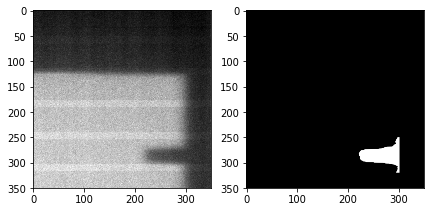

batch:3, item:16, dist: 35


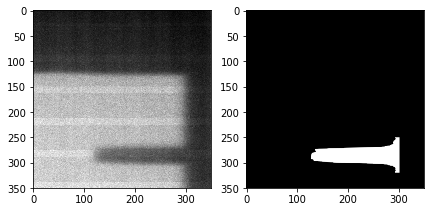

In [16]:
for i, batch in enumerate(data_loader):
    images_batch, masks_batch, dists_batch = batch['image'], batch['mask'], batch['dist']
    for j, (img, mask, dist) in enumerate(zip(images_batch, masks_batch, dists_batch)):
            
        print("batch:{}, item:{}, dist: {}".format(i+1, j+1, dist))
        f = plt.figure(figsize=(7,4))
        f.add_subplot(1,2, 1)
        plt.imshow(img[0,...], cmap='gray')
        f.add_subplot(1,2, 2)
        plt.imshow(mask[0,...], cmap='gray')
        plt.show(block=True)
    if i==2:
        break